**Second List - Time Series 2023/01**

Bruno Baptista Guerra - 2016203441

Deadline: 16/07/2023



---



# Library



---



From the codes made available by the teacher during the classes, we imported all the libraries in the section below for the purpose of leaving them orginized in just one block in this *notebook*


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Part 1



---



## Question 1


---


"Milk.txt" is a time series of monthly milk production per cow with values from 01/1962 to 12/1975. Separate the data into two parts: a time series from 01/1962 to 12/1973 and another time series from 01/1974 to 12/1975. Perform the decomposition of the first part using STL decomposition and show the graphics. After that, predict the production for the years 1974 to 1975 using the seasonality component of the STL and the autoregressive (AR) model to predict the trend + residual components. Show the graphics of actual values and predicted values. Calculate the MSE of the prediction. Comment your solution. In Python, the following functions can be used:

*   from statsmodels.tsa.seasonal import STL
*   from statsmodels.tsa.ar_model import AutoReg

In [2]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.ar_model import AutoReg

Load and preprocess the data:

**(Remind to upload "milk.txt")**

In [3]:
data = pd.read_csv("milk.txt", index_col=False, header=None)
indx = data.index
data = [data.iloc[i, 0] for i in range(len(indx))]

time_series = pd.Series(data, index=pd.date_range("1-1-1962", periods=len(data), freq="MS"), name="Monthly Milk Production")

Text(0.5, 1.0, 'Monthly Milk Production')

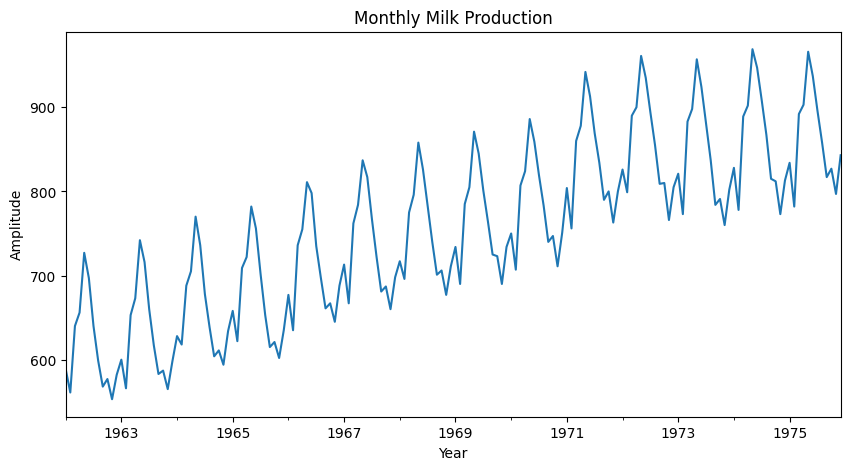

In [4]:
fig = time_series.plot(figsize = (10,5))
plt.xlabel('Year')
plt.ylabel('Amplitude')
plt.title(time_series.name)

Separate the data into two parts: 01/1962 to 12/1973 and 01/1974 to 12/1975

In [5]:
data_part1 = time_series[:"1973-12-01"]
data_part2 = time_series["1974-01-01":]

Perform STL decomposition for the first part (01/1962 to 12/1973) and visualize the decomposition components:

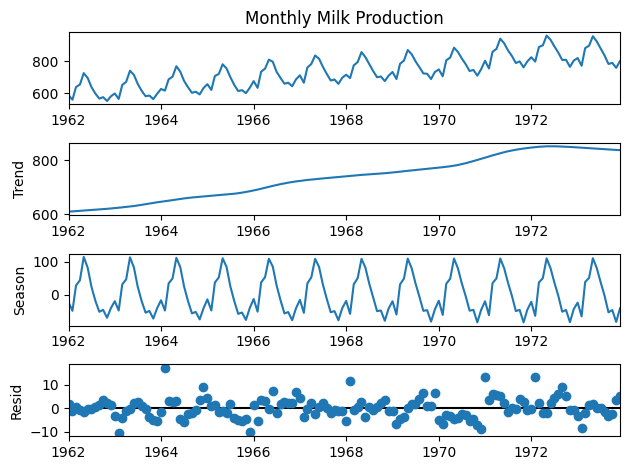

In [6]:
#STL decomposition
stl = STL(data_part1)# seasonal=13, period=12)
result = stl.fit()
fig = result.plot()

Predict the production for the years 1974 to 1975 creating an autoregressive model for the trend + residual components:

In [7]:
seasonality = result.seasonal["1972-01-01":]
trend_residuals = result.trend["1962-01-01": "1973-12-01"] + result.resid["1962-01-01": "1973-12-01"]

model = AutoReg(trend_residuals, lags=12)
model_fit = model.fit()
predictions = model_fit.predict(start="1974-01-01", end="1975-12-01")

Because of some errors in indexing the time series, it was necessary to reset index to perform correctly prediction operations using seasonality and prediction

In [8]:
seasonality.reset_index(drop=True, inplace=True)

seasonality = pd.Series(seasonality)

predictions.reset_index(drop=True, inplace=True)

predictions = pd.Series(predictions)

data_part2.reset_index(drop=True, inplace=True)

data_part2 = pd.Series(data_part2)

Visualize the actual values and predicted values:

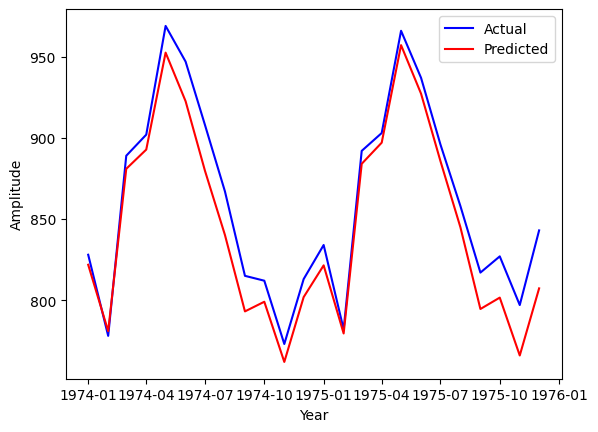

In [9]:
index = pd.date_range("1974-01-01", periods=24, freq="MS")
plt.plot(index, data_part2, label="Actual", c="blue")
plt.plot(index, seasonality + predictions, label="Predicted", c="red")
plt.xlabel('Year')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

Calculate the mean squared error (MSE) of the prediction:

In [10]:
mse = ((data_part2 - (seasonality + predictions)) ** 2).mean()
print("MSE: {:.2f}".format(mse))

MSE: 315.68


When comparing the test data (01/1974 to 12/1975) with the forecast results (autoregressive model (AR) + seasonality), the forecast model used seems to be able to obtain.
The sequence is close to the true sequence, giving a value of MSE = 315.68

## Question 2


---


For the industrial_process.txt time series, do: convert the time series values to integer values, i.e., use the round function. Then, you must compress the data by combining delta encoding and Fibonacci binary encoding methods. Calculate the compression ratio (assume that the original time series values are represented by 32 bits) and the MSE of the reconstruction error. Show the graphics for the original time series and the reconstructed time series. What consequence on MSE and compression ratio if the data were not rounded to integer values?

Load and preprocess the data, then convert time series values to integers:

**(Remind to upload "new_industrial_process.txt")**

In [11]:
# Read the time series data from the file
time_series = pd.read_csv("new_industrial_process.txt", header=None)
# Convert time series values to integers
integer_values = np.round(time_series).to_numpy()

Fibonacci functions to enconde and decode the time series:

*   Defines a recursive Fibonacci function **fibonacci_binary()** that generates a binary-encoded Fibonacci sequence;
*   Defines two additional functions: **fibonacci_encode()** and **fibonacci_decode()**. These functions convert numerical values to their Fibonacci-encoded representation and decode Fibonacci-encoded values back to their original form.


In [12]:
def fibonacci_binary(n, a=-1, b=1, i=0):
    if (b * n) > 0 and (b * n) <= (b * b - i % 2):
        result = fibonacci_binary(n + a)
        return  f"1{result:0>{i}}"
    elif n:
        return fibonacci_binary(n, b, a - b, i + 1)
    else:
        return ""

def fibonacci_encode(value):
    output = fibonacci_binary(value)
    if output == '':
        return '0'
    return output

def fibonacci_decode(value):
    fibonacci_sequence = [0, 1]
    for i in range(2, len(value) + 2):
        fibonacci_sequence.append(-fibonacci_sequence[-1] + fibonacci_sequence[-2])

    total = 0
    for i in range(len(value)):
        if value[i] == '1':
            total += fibonacci_sequence[-i-2]
    return total

Functions to delta encoding and decoding:


*   Two functions, **delta_encode()** and **delta_decode()**, are defined for delta encoding and decoding, respectively;
*   Delta encoding computes the difference between consecutive values in the input data and stores them as encoded values;
*   Delta decoding reconstructs the original values from the encoded data by adding the differences to the previous values.



In [13]:
# Delta Encoding
def delta_encode(data):
    encoded_data = [data[0]]

    for i in range(1, len(data)):
        delta = data[i] - data[i-1]
        encoded_data.append(delta)

    return np.array(encoded_data)

def delta_decode(encoded_data):
    decoded_data = [encoded_data[0]]
    for i in range(1, len(encoded_data)):
        value = decoded_data[i-1] + encoded_data[i]
        decoded_data.append(value)

    return np.array(decoded_data)

Applies delta encoding to the integer_values array, resulting in the delta array.

In [14]:
delta = delta_encode(integer_values)

Creates an empty list **'fibo'** and iterates over each value in **'delta'**, encoding them using fibonacci_encode() and appending the result to **'fibo'**.

In [15]:
fibo = []
for value in delta:
  fibo.append(fibonacci_encode(value))

Creates an empty list **'decode_fibo'** and iterates over each value in **'fibo'**, decoding them using fibonacci_decode() and appending the result to **'decode_fibo'**.

In [16]:
decode_fibo = []
for value in fibo:
  decode_fibo.append(fibonacci_decode(value))

Finally, the **'decode_fibo'** list is delta-decoded, producing the **'decode_delta'** array.

In [17]:
decode_delta = delta_decode(decode_fibo)

Size and Compression Rate Calculation:


*   The original size of the **'integer_values'** array is calculated assuming each value is a 32-bit integer;
*   The encoded size is determined by the length of the **'fibo'** list;
*   The compression rate is calculated as a percentage by dividing the encoded size by the original size and multiplying by 100.



In [18]:
original_size = len(integer_values) * 32  # Assuming each value is a 32-bit integer
print("Original Size: {:.2f}".format(original_size))
encoded_size = len(fibo) * 2
print("Encoded Size: {:.2f}".format(encoded_size))
compression_rate = (encoded_size / original_size)
print("Compression Rate: {:.4f}".format(compression_rate))

Original Size: 956800.00
Encoded Size: 59800.00
Compression Rate: 0.0625


Mean Squared Error (MSE) Calculation:

*   The code calculates the mean squared error (mse) between the integer_values array (transposed) and the decode_delta array.


As we can see, the MSE is equal to 0 because there was no loss of information, the same can be seen below when comparing the "Original Time Series" with "Reconstructed Time Series".

In [19]:
integer_values_transpose = np.transpose(integer_values)
mse = ((np.array(integer_values_transpose) - np.array(decode_delta)) ** 2).mean()
print("MSE: {:.9f}".format(mse))

MSE: 0.000000000


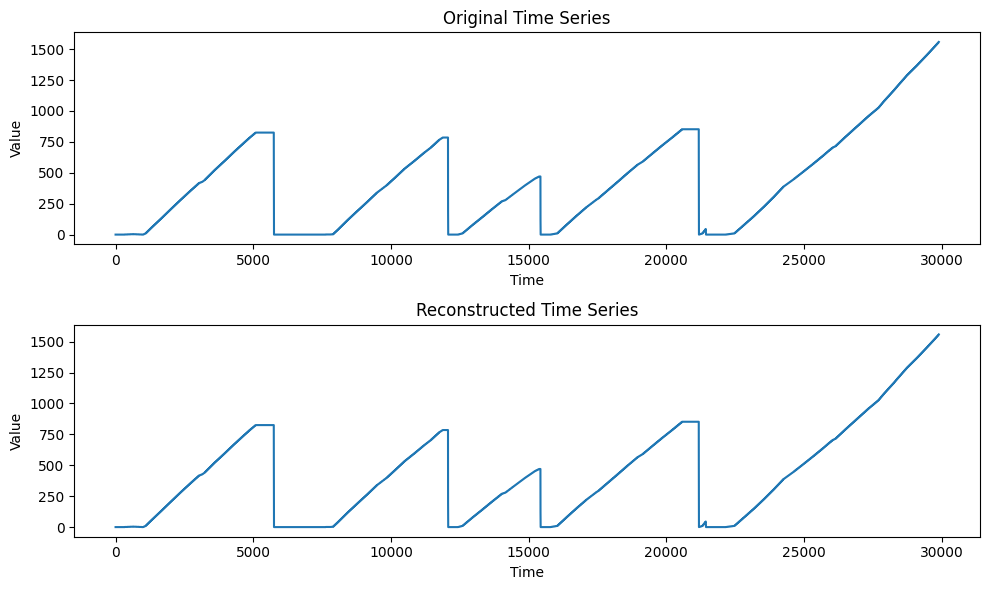

In [20]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(integer_values)
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.subplot(2, 1, 2)
plt.plot(decode_delta)
plt.title('Reconstructed Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

  If the data is not rounded to integer values, the impact on the MSE and on the compression rate worsens the data compression rate, as it increases the amount of new codes created due to the number of distinct values, consequently increasing the number of bits required in the Fibonacci binary encoding method.

  On the other hand, when not using the round function, the MSE value decreases, that is, it effectively becomes a lossless compression. Given the data presented, it is concluded that the conversion of the historical series to integer values ​​improves the data compression rate, but to the detriment of signal reconstruction as the MSE increases.



## Question 3


---
Design the Huffman coding for the symbols of the table. Calculate the compression ratio (assume that the symbols are represented by 8 bits). This question can be done manually.


Symbols | Probability
-------------------|------------------
A       | 0.10
B       | 0.15
C       | 0.20
D       | 0.25
E       | 0.07
F       | 0.23


First, we define the symbols and their probabilities

In [21]:
import heapq

# Define the symbols and their probabilities
symbols = {
    'A': 0.10,
    'B': 0.15,
    'C': 0.20,
    'D': 0.25,
    'E': 0.07,
    'F': 0.23
}

Define the Node class and sort the list of nodes in ascending order based on their probabilities.

In [22]:
class Node:
    def __init__(self, symbol, probability):
        self.symbol = symbol
        self.probability = probability
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.probability < other.probability


Create a list of nodes, where each node represents a symbol and its probability.

In [23]:
nodes = [Node(symbol, probability) for symbol, probability in symbols.items()]

Build the Huffman tree by merge the two nodes with the lowest probabilities to create a new node. The probability of the new node is the sum of the probabilities of the merged nodes. Repeat this step until only one node is left in the list.

In [24]:
heapq.heapify(nodes)
while len(nodes) > 1:
    left_node = heapq.heappop(nodes)
    right_node = heapq.heappop(nodes)
    new_node = Node(None, left_node.probability + right_node.probability)
    new_node.left = left_node
    new_node.right = right_node
    heapq.heappush(nodes, new_node)

Assign a '0' bit to the left branch of each node and a '1' bit to the right branch.Then, traverse the tree from the root to each leaf to determine the Huffman code for each symbol.

In [25]:
def traverse(node, code=''):
    if node.symbol:
        huffman_codes[node.symbol] = code
    else:
        traverse(node.left, code + '0')
        traverse(node.right, code + '1')

huffman_codes = {}
traverse(nodes[0])

Calculate the compression ratio by multiplying the length of each Huffman code by its corresponding probability, summing up these values, and dividing by 8 (assuming 8 bits per symbol). Then, print the Huffman codes and the compression ratio

In [26]:
for symbol in symbols:
    print(f'{symbol}: {huffman_codes[symbol]}')

A: 1111
B: 110
C: 00
D: 10
E: 1110
F: 01


In [27]:
compression_ratio = sum(len(huffman_codes[symbol]) * symbols[symbol] for symbol in symbols) / 8
print("Compression Rate: {:.4f}".format(compression_ratio))

Compression Rate: 0.3113


# Part 2


---



3W Dataset is a public multivariate time series with rare undesirable real events in oil wells (https://github.com/ricardovvargas/3w_dataset). This dataset is composed of 1,984 CSV files, where each file represents one instance, which can be a real, simulated, or hand-drawn instance. There are one observation per line and one variable per column. Columns are separated by commas and decimals are separated by periods. The first column contains timestamps, the last one reveals the observations' labels, and the other columns are the Multivariate Time Series (MTS) (i.e. the instance itself).
For questions 4 and 5, there are 7 instances (5 simulated (SIM csv files) and 2 real (WELL csv files) instances) from the fault event “Spurious Closure of DHSV”. Each instance has the same number of columns: Timestamp, P-PDG, P-TPT, T-TPT, class, where Timestamp is the time of the observation (in seconds), P-PDG, P-TPT, and T-TPT are the variables of the process, and class is the label of each timestamp. Each instance begins in a normality condition (class 0) and, after some time, it evolves into a fault condition (class 2). The figure below shows the scaled values between 0 and 1 of P-PDG, P-TPT, T-TPT, and class of the WELL-01.csv instance.

## Question 4


---


For the real instances, WELL-01.csv and WELL-02.csv, compute for each variable (P-PDG, P-TPT, T-TPT) of each class (0 and 2) the Binary Pattern (BP). For this, for each instance, you will split the multivariate time series into two parts: the data labeled as class 0 and the data labeled as class 2. After, compute for each variable of each class the BP with n = 5 (each histogram will have 16 bins). Show the normalized histogram of each variable of each class of each instance (for each instance will have 3 histograms for each class (a total of 12 histograms). Use the subplot function to become the visualization easier. Analyze the obtained histograms and check if it is possible to distinguish the classes by the histograms and if the behavior of the classes is consistent in the two instances. Comment on your observations.


**(Remind to upload "WELL-01.csv" and "WELL-02.csv")**

Importing the data from two CSV files ("WELL-01.csv" and "WELL-02.csv") into pandas DataFrames:

In [28]:
data1 = pd.read_csv('WELL-01.csv')
data2 = pd.read_csv('WELL-02.csv')

Converting the DataFrames to arrays:

In [29]:
data1 = data1.values
data2 = data2.values

Separating the data from each dataset into two classes based on the value in the 5th column (index 4):

In [30]:
data1_class0 = data1[data1[:, 4] == 0, :]
data1_class2 = data1[data1[:, 4] == 2, :]
data2_class0 = data2[data2[:, 4] == 0, :]
data2_class2 = data2[data2[:, 4] == 2, :]

Applying the Binary Pattern (BP) calculation to each dataset's specific classes:

For WELL-01, class 0 and 2:

In [31]:
# Apply Binary Pattern
n = 5
c = n - int(np.ceil(n/2))  # Variable to adjust the line in the code

# Binary Pattern for WELL-01 class 0
MAP10 = np.zeros((len(data1_class0) - 4, 3), dtype=int)  # Set dtype to int
for i in range(2, len(data1_class0) - 2):
    for j in range(1, 4):
        BP = np.zeros(4, dtype=int)  # Set dtype to int
        if data1_class0[i-2, j] < data1_class0[i, j]:
            BP[0] = 0
        else:
            BP[0] = 1

        if data1_class0[i-1, j] < data1_class0[i, j]:
            BP[1] = 0
        else:
            BP[1] = 1

        if data1_class0[i+1, j] < data1_class0[i, j]:
            BP[2] = 0
        else:
            BP[2] = 1

        if data1_class0[i+2, j] < data1_class0[i, j]:
            BP[3] = 0
        else:
            BP[3] = 1

        MAP10[i-2, j-1] = int(''.join(map(str, BP)), 2)

# Binary Pattern for WELL-01 class 2
MAP12 = np.zeros((len(data1_class2) - 4, 3), dtype=int)  # Set dtype to int
for i in range(2, len(data1_class2) - 2):
    for j in range(1, 4):
        BP = np.zeros(4, dtype=int)  # Set dtype to int
        if data1_class2[i-2, j] < data1_class2[i, j]:
            BP[0] = 0
        else:
            BP[0] = 1

        if data1_class2[i-1, j] < data1_class2[i, j]:
            BP[1] = 0
        else:
            BP[1] = 1

        if data1_class2[i+1, j] < data1_class2[i, j]:
            BP[2] = 0
        else:
            BP[2] = 1

        if data1_class2[i+2, j] < data1_class2[i, j]:
            BP[3] = 0
        else:
            BP[3] = 1

        MAP12[i-2, j-1] = int(''.join(map(str, BP)), 2)

For WELL-02, class 0 and 2:

In [32]:
# Binary Pattern for WELL-02 class 0
MAP20 = np.zeros((len(data2_class0) - 4, 3), dtype=int)  # Set dtype to int
for i in range(2, len(data2_class0) - 2):
    for j in range(1, 4):
        BP = np.zeros(4, dtype=int)  # Set dtype to int
        if data2_class0[i-2, j] < data2_class0[i, j]:
            BP[0] = 0
        else:
            BP[0] = 1

        if data2_class0[i-1, j] < data2_class0[i, j]:
            BP[1] = 0
        else:
            BP[1] = 1

        if data2_class0[i+1, j] < data2_class0[i, j]:
            BP[2] = 0
        else:
            BP[2] = 1

        if data2_class0[i+2, j] < data2_class0[i, j]:
            BP[3] = 0
        else:
            BP[3] = 1

        MAP20[i-2, j-1] = int(''.join(map(str, BP)), 2)

# Binary Pattern for WELL-02 class 2
MAP22 = np.zeros((len(data2_class2) - 4, 3), dtype=int)  # Set dtype to int
for i in range(2, len(data2_class2) - 2):
    for j in range(1, 4):
        BP = np.zeros(4, dtype=int)  # Set dtype to int
        if data2_class2[i-2, j] < data2_class2[i, j]:
            BP[0] = 0
        else:
            BP[0] = 1

        if data2_class2[i-1, j] < data2_class2[i, j]:
            BP[1] = 0
        else:
            BP[1] = 1

        if data2_class2[i+1, j] < data2_class2[i, j]:
            BP[2] = 0
        else:
            BP[2] = 1

        if data2_class2[i+2, j] < data2_class2[i, j]:
            BP[3] = 0
        else:
            BP[3] = 1

        MAP22[i-2, j-1] = int(''.join(map(str, BP)), 2)

The Binary Pattern (BP) is calculated by comparing the values of attributes (columns 1, 2, and 3) with the surrounding values for each data point. Depending on whether the attribute value is greater or smaller than its surrounding values, a binary value (0 or 1) is assigned. These binary values are then converted to a decimal number using int(''.join(map(str, BP)), 2) and stored in the corresponding MAP array.

The two figures below show the normalized histograms for each class and attribute of both dataset sobtained by the binary pattern (BP) method, using blocks of length n = 5, resulting in 4 bits in the analysis of each block, that is, codes for 16 patterns per sample.:

*   The histograms show the distribution of the calculated Binary Pattern values for each attribute (P-PDG, P-TPT, and T-TPT) within each class (0 and 2) of both datasets (WELL-01 and WELL-02).

Totaling 12 histograms (6 for each dataset) built in each cell of codes in Google Colab, as shown in the figures below.

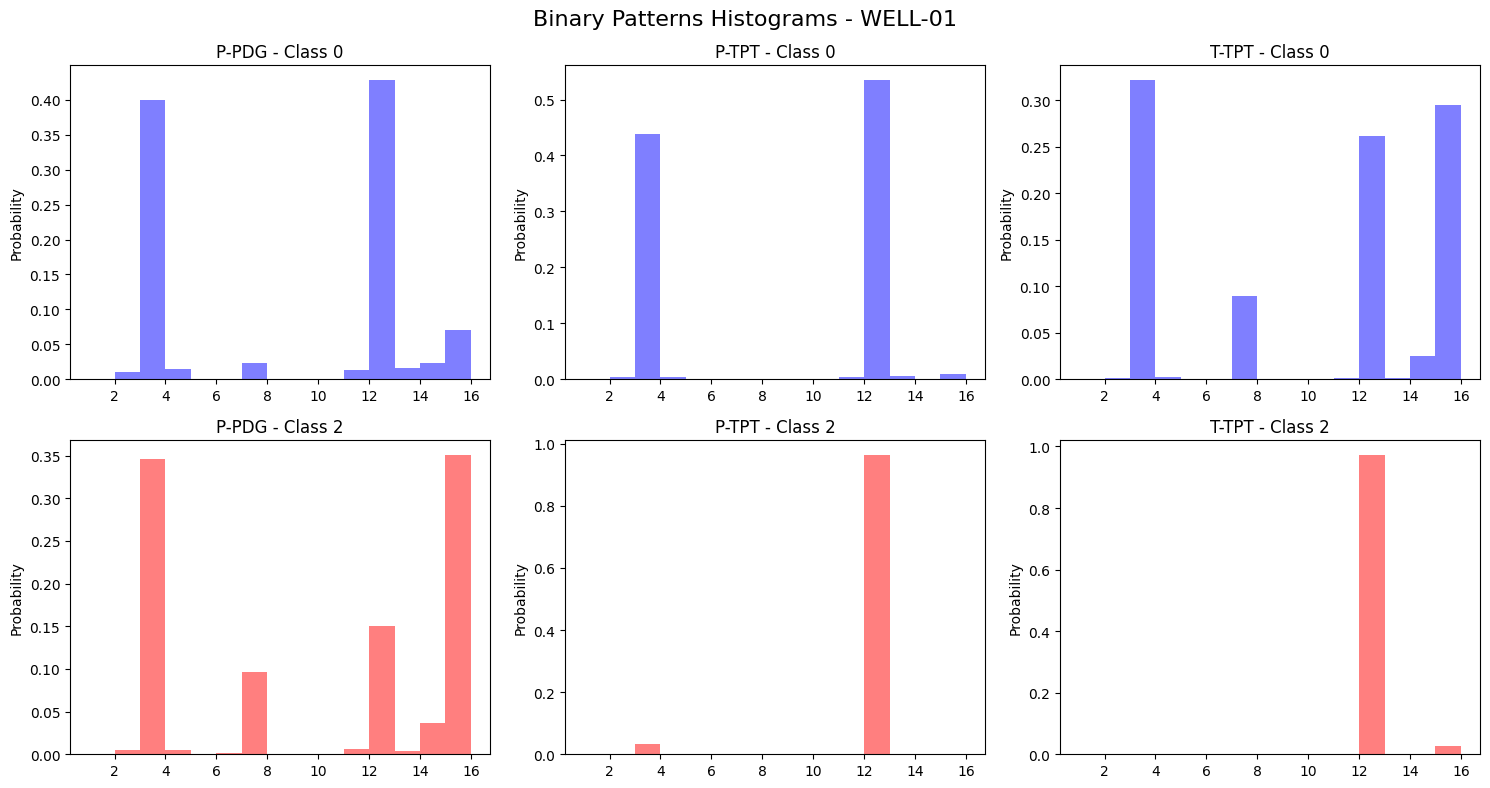

In [33]:
# Plot normalized histograms
edges = np.arange(1, 17)
plt.figure(figsize=(15, 8))
plt.suptitle(f'Binary Patterns Histograms - WELL-01', fontsize=16)

plt.subplot(2, 3, 1)
plt.hist(MAP10[:, 0], bins=edges, density=True, color='blue', alpha=0.5)
plt.title('P-PDG - Class 0')
plt.ylabel('Probability')

plt.subplot(2, 3, 2)
plt.hist(MAP10[:, 1], bins=edges, density=True, color='blue', alpha=0.5)
plt.title('P-TPT - Class 0')
plt.ylabel('Probability')

plt.subplot(2, 3, 3)
plt.hist(MAP10[:, 2], bins=edges, density=True, color='blue', alpha=0.5)
plt.title('T-TPT - Class 0')
plt.ylabel('Probability')

plt.subplot(2, 3, 4)
plt.hist(MAP12[:, 0], bins=edges, density=True, color='red', alpha=0.5)
plt.title('P-PDG - Class 2')
plt.ylabel('Probability')

plt.subplot(2, 3, 5)
plt.hist(MAP12[:, 1], bins=edges, density=True, color='red', alpha=0.5)
plt.title('P-TPT - Class 2')
plt.ylabel('Probability')

plt.subplot(2, 3, 6)
plt.hist(MAP12[:, 2], bins=edges, density=True, color='red', alpha=0.5)
plt.title('T-TPT - Class 2')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()

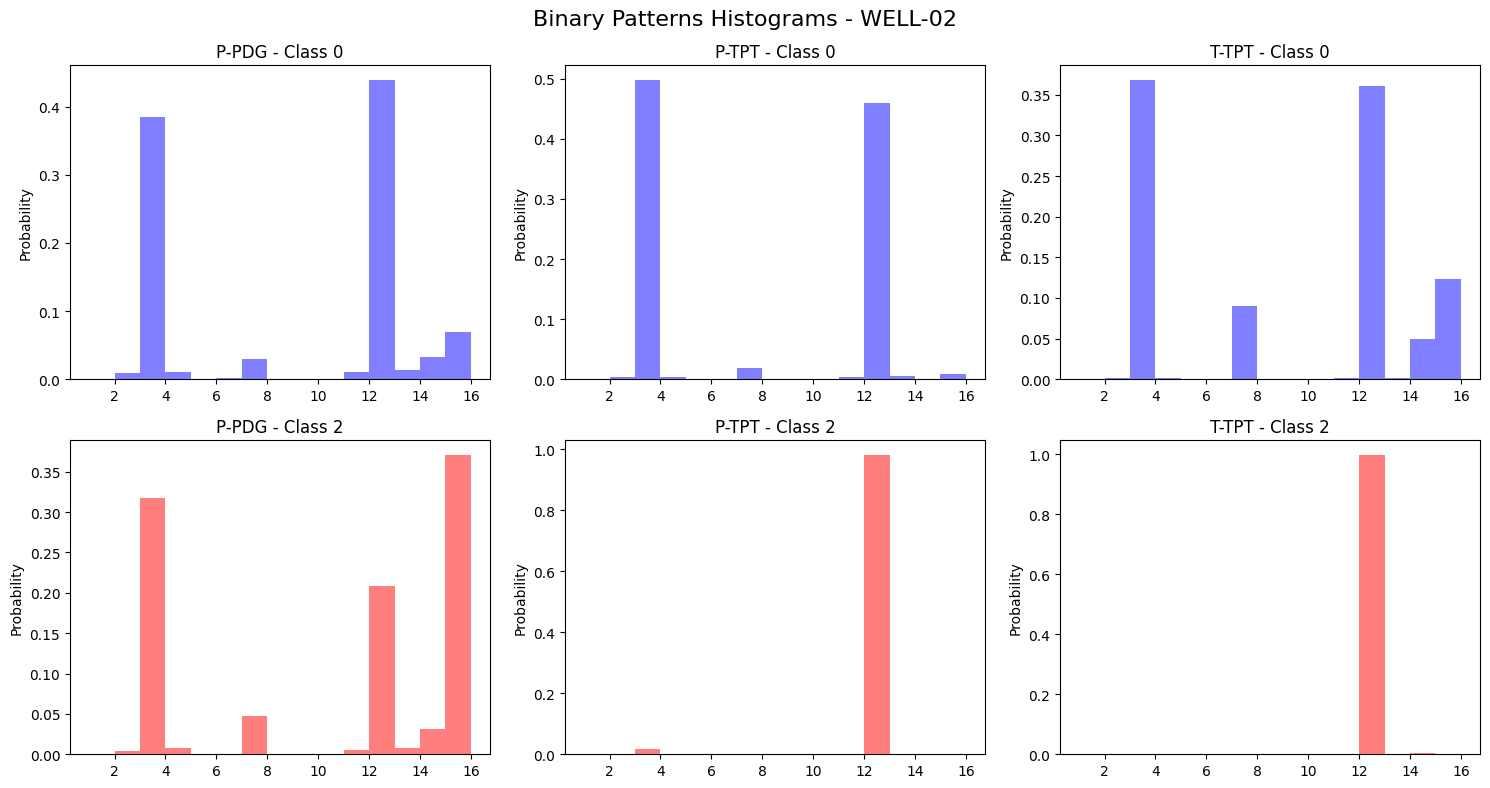

In [34]:
# Plot normalized histograms
edges = np.arange(1, 17)
plt.figure(figsize=(15, 8))
plt.suptitle(f'Binary Patterns Histograms - WELL-02', fontsize=16)

plt.subplot(2, 3, 1)
plt.hist(MAP20[:, 0], bins=edges, density=True, color='blue', alpha=0.5)
plt.title('P-PDG - Class 0')
plt.ylabel('Probability')

plt.subplot(2, 3, 2)
plt.hist(MAP20[:, 1], bins=edges, density=True, color='blue', alpha=0.5)
plt.title('P-TPT - Class 0')
plt.ylabel('Probability')

plt.subplot(2, 3, 3)
plt.hist(MAP20[:, 2], bins=edges, density=True, color='blue', alpha=0.5)
plt.title('T-TPT - Class 0')
plt.ylabel('Probability')

plt.subplot(2, 3, 4)
plt.hist(MAP22[:, 0], bins=edges, density=True, color='red', alpha=0.5)
plt.title('P-PDG - Class 2')
plt.ylabel('Probability')

plt.subplot(2, 3, 5)
plt.hist(MAP22[:, 1], bins=edges, density=True, color='red', alpha=0.5)
plt.title('P-TPT - Class 2')
plt.ylabel('Probability')

plt.subplot(2, 3, 6)
plt.hist(MAP22[:, 2], bins=edges, density=True, color='red', alpha=0.5)
plt.title('T-TPT - Class 2')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()

By looking at the graph, extracting these characteristics, it is possible to distinguish class "0" and "2", and the main characteristics to distinguish categories are as follows:

*   Although you get a lot of relevant information from the P-PDG attributes, the P-TPT and T-TPT attributes are the best for distinguishing categories;
*   The fact that the characteristics obtained by the Binary Pattern method for the WELL-01 and WELL-02 time series are similar indicates that the method tends to be robust for classifying the time series of this process;
*   When analyzing the P-PDG variable separately, it can be observed that it has two peaks in both categories, one close to 3 and the other close to 12.


All of this characteristic makes it difficult to distinguish categories based only on this information. However, for the P-TPT and T-TPT variables, a distribution similar to that of P-PDG was observed in category 0, while higher concentrations around 12 were observed in category 2. This makes it possible to distinguish the classes by looking at the histogram. The behavior of the class is consistent in both cases for all analyzed variables.


## Question 5


---


Use kNN (k-nearest neighbors) and the simulated instances to classify the real ones. For each simulated instance, use a sliding window of length equal to 100 (without overlapping) in each variable (P-PDG, P-TPT, T-TPT) to compute the features: mean, standard deviation, mean increase, mean decrease, standard deviation differences, and mean absolute differences (each data window will be represented by a vector of 6x3 = 18 features). For each vector, you must associate the most predominant class in the data window. These vectors will be the training set of the kNN classifier. Perform the same procedure in real instances to obtain their feature vectors. These vectors will be the test set. Standardize the data (training and test sets), that is, apply for each element of each vector the equation below, where the mean and standard deviation are obtained from the training set for each feature. Use kNN, with k = 1, to classify the test set. Evaluate the classification performance using the accuracy metric. You can use the sklearn.neighbors.KNeighborsClassifier function in Python, or fitcknn in Matlab.

**(Remind to upload 'SIM-01.csv', 'SIM-02.csv', 'SIM-03.csv', 'SIM-04.csv' and 'SIM-05.csv')**

Import training data

Reads five CSV files ('SIM-01.csv', 'SIM-02.csv', 'SIM-03.csv', 'SIM-04.csv', 'SIM-05.csv') using pd.read_csv and stores them in five separate DataFrame variables: data1, data2, data3, data4, and data5.

In [35]:
data1 = pd.read_csv('SIM-01.csv')
data2 = pd.read_csv('SIM-02.csv')
data3 = pd.read_csv('SIM-03.csv')
data4 = pd.read_csv('SIM-04.csv')
data5 = pd.read_csv('SIM-05.csv')

Converts each DataFrame into a NumPy array using the values attribute and assigns them back to the respective variables (data1, data2, data3, data4, data5).

In [36]:
data1 = data1.values
data2 = data2.values
data3 = data3.values
data4 = data4.values
data5 = data5.values

Vertically stacks the five data arrays together using np.vstack and assigns the result to datatrain.

In [37]:
datatrain = np.vstack((data1, data2, data3, data4, data5))

Calculate characteristics of the training dataset

In [38]:
sliding_window_length = 100  # Sliding window length
ctrain = np.zeros((len(datatrain) // sliding_window_length, 18))
ytrain = np.zeros((len(datatrain) // sliding_window_length, 1))

Make a loop that iterates from 1 to the length of **'datatrain'** divided by the sliding window length, inclusive. Inside the loop, it performs the following steps for each iteration:



*   Calculates the mean and standard deviation of each attribute within the current sliding window and stores them in the **'ctrain'** array;
*   Calculates various metrics related to increments and decrements for each attribute (P-PDG, P-TPT, T-TPT) within the current sliding window and stores them in the **'ctrain'** array;
*   Determines the most frequent label within the current sliding window and assigns it to the corresponding element in the **'ytrain'** array.

In [39]:
for i in range(1, len(datatrain) // sliding_window_length + 1):
    # Mean of each attribute
    ctrain[i - 1, 0] = np.mean(datatrain[sliding_window_length * (i - 1):sliding_window_length * i, 1])  # P-PDG
    ctrain[i - 1, 1] = np.mean(datatrain[sliding_window_length * (i - 1):sliding_window_length * i, 2])  # P-TPT
    ctrain[i - 1, 2] = np.mean(datatrain[sliding_window_length * (i - 1):sliding_window_length * i, 3])  # T-TPT

    # Standard deviation of each attribute
    ctrain[i - 1, 3] = np.std(datatrain[sliding_window_length * (i - 1):sliding_window_length * i, 1])  # P-PDG
    ctrain[i - 1, 4] = np.std(datatrain[sliding_window_length * (i - 1):sliding_window_length * i, 2])  # P-TPT
    ctrain[i - 1, 5] = np.std(datatrain[sliding_window_length * (i - 1):sliding_window_length * i, 3])  # T-TPT

    # Metrics of increment and decrement for P-PDG
    inc = []
    dec = []
    diff = []
    for j in range(sliding_window_length * (i - 1), sliding_window_length * i - 1):
        diff.append(datatrain[j + 1, 1] - datatrain[j, 1])
        if diff[-1] > 0:
            inc.append(diff[-1])
        if diff[-1] < 0:
            dec.append(diff[-1])

    ctrain[i - 1, 6] = np.mean(inc)  # Mean increase
    ctrain[i - 1, 9] = np.mean(dec)  # Mean decrease
    ctrain[i - 1, 12] = np.std(diff)  # Standard deviation differences
    ctrain[i - 1, 15] = np.mean(np.abs(diff))  # Mean absolute differences

    # Metrics of increment and decrement for P-TPT
    inc = []
    dec = []
    diff = []
    for j in range(sliding_window_length * (i - 1), sliding_window_length * i - 1):
        diff.append(datatrain[j + 1, 2] - datatrain[j, 2])
        if diff[-1] > 0:
            inc.append(diff[-1])
        if diff[-1] < 0:
            dec.append(diff[-1])

    ctrain[i - 1, 7] = np.mean(inc)  # Mean increase
    ctrain[i - 1, 10] = np.mean(dec)  # Mean decrease
    ctrain[i - 1, 13] = np.std(diff)  # Standard deviation differences
    ctrain[i - 1, 16] = np.mean(np.abs(diff))  # Mean absolute differences

    # Metrics of increment and decrement for T-TPT
    inc = []
    dec = []
    diff = []
    for j in range(sliding_window_length * (i - 1), sliding_window_length * i - 1):
        diff.append(datatrain[j + 1, 3] - datatrain[j, 3])
        if diff[-1] > 0:
            inc.append(diff[-1])
        if diff[-1] < 0:
            dec.append(diff[-1])

    ctrain[i - 1, 8] = np.mean(inc)  # Mean increase
    ctrain[i - 1, 11] = np.mean(dec)  # Mean decrease
    ctrain[i - 1, 14] = np.std(diff)  # Standard deviation differences
    ctrain[i - 1, 17] = np.mean(np.abs(diff))  # Mean absolute differences

    # Insert label (most frequent label)
    ytrain[i - 1, 0] = np.argmax(np.bincount(datatrain[sliding_window_length * (i - 1):sliding_window_length * i, 4].astype(int)))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Replaces any NaN values in the **'ctrain'** array with zeros using np.isnan(ctrain) and assigns the result back to **'ctrain'**.

In [40]:
ctrain[np.isnan(ctrain)] = 0

Import test data

In [41]:
test1 = pd.read_csv('WELL-01.csv')
test2 = pd.read_csv('WELL-02.csv')

Convert to arrays

In [42]:
test1 = test1.values
test2 = test2.values

Vertically stacks the testing arrays together using np.vstack and assigns the result to **'datatest'**.

In [43]:
datatest = np.vstack((test1, test2))

It initializes two empty NumPy arrays: **'ctest'** with shape (len(datatest) // sliding_window_length, 18) and **'ytest'** with shape (len(datatest) // sliding_window_length, 1).

In [44]:
ctest = np.zeros((len(datatest) // sliding_window_length, 18))
ytest = np.zeros((len(datatest) // sliding_window_length, 1))

Enters a loop that iterates from 1 to the length of **'datatest'** divided by the sliding window length, inclusive. Inside the loop, it performs the same steps as in step 6, but using the testing data instead of training data, and stores the results in the **'ctest'** and **'ytest'** arrays.

In [45]:
for i in range(1, len(datatest) // sliding_window_length + 1):
    # Mean of each attribute
    ctest[i - 1, 0] = np.mean(datatest[sliding_window_length * (i - 1):sliding_window_length * i, 1])  # P-PDG
    ctest[i - 1, 1] = np.mean(datatest[sliding_window_length * (i - 1):sliding_window_length * i, 2])  # P-TPT
    ctest[i - 1, 2] = np.mean(datatest[sliding_window_length * (i - 1):sliding_window_length * i, 3])  # T-TPT

    # Standard deviation of each attribute
    ctest[i - 1, 3] = np.std(datatest[sliding_window_length * (i - 1):sliding_window_length * i, 1])  # P-PDG
    ctest[i - 1, 4] = np.std(datatest[sliding_window_length * (i - 1):sliding_window_length * i, 2])  # P-TPT
    ctest[i - 1, 5] = np.std(datatest[sliding_window_length * (i - 1):sliding_window_length * i, 3])  # T-TPT

    # Metrics of increment and decrement for P-PDG
    inc = []
    dec = []
    diff = []
    for j in range(sliding_window_length * (i - 1), sliding_window_length * i - 1):
        diff.append(datatest[j + 1, 1] - datatest[j, 1])
        if diff[-1] > 0:
            inc.append(diff[-1])
        if diff[-1] < 0:
            dec.append(diff[-1])

    ctest[i - 1, 6] = np.mean(inc)  # Mean increase
    ctest[i - 1, 9] = np.mean(dec)  # Mean decrease
    ctest[i - 1, 12] = np.std(diff)  # Standard deviation differences
    ctest[i - 1, 15] = np.mean(np.abs(diff))  # Mean absolute differences

    # Metrics of increment and decrement for P-TPT
    inc = []
    dec = []
    diff = []
    for j in range(sliding_window_length * (i - 1), sliding_window_length * i - 1):
        diff.append(datatest[j + 1, 2] - datatest[j, 2])
        if diff[-1] > 0:
            inc.append(diff[-1])
        if diff[-1] < 0:
            dec.append(diff[-1])

    ctest[i - 1, 7] = np.mean(inc)  # Mean increase
    ctest[i - 1, 10] = np.mean(dec)  # Mean decrease
    ctest[i - 1, 13] = np.std(diff)  # Standard deviation differences
    ctest[i - 1, 16] = np.mean(np.abs(diff))  # Mean absolute differences

    # Metrics of increment and decrement for T-TPT
    inc = []
    dec = []
    diff = []
    for j in range(sliding_window_length * (i - 1), sliding_window_length * i - 1):
        diff.append(datatest[j + 1, 3] - datatest[j, 3])
        if diff[-1] > 0:
            inc.append(diff[-1])
        if diff[-1] < 0:
            dec.append(diff[-1])

    ctest[i - 1, 8] = np.mean(inc)  # Mean increase
    ctest[i - 1, 11] = np.mean(dec)  # Mean decrease
    ctest[i - 1, 14] = np.std(diff)  # Standard deviation differences
    ctest[i - 1, 17] = np.mean(np.abs(diff))  # Mean absolute differences

    # Insert label (most frequent label)
    ytest[i - 1, 0] = np.argmax(np.bincount(datatest[sliding_window_length * (i - 1):sliding_window_length * i, 4].astype(int)))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 Replaces any NaN values in the ctest array with zeros using np.isnan(ctest) and assigns the result back to **'ctest'**.

In [46]:
ctest[np.isnan(ctest)] = 0

Standardizes the training and testing data by subtracting the mean of the training data and dividing by the standard deviation of the training data for each feature separately. The standardized arrays are assigned back to **'ctrainn'** and **'ctestn'**, respectively.

In [47]:
ctrainn = (ctrain - np.mean(ctrain, axis=0)) / np.std(ctrain, axis=0)
ctestn = (ctest - np.mean(ctrain, axis=0)) / np.std(ctrain, axis=0)

Apply NN

In [48]:
d = np.zeros((len(ytest), len(ytrain)))
correct  = 0

for i in range(len(ytest)):
    for j in range(len(ytrain)):
        d[i, j] = np.dot((ctestn[i, :] - ctrainn[j, :]), (ctestn[i, :] - ctrainn[j, :]))

    index = np.argmin(d[i, :])
    if ytrain[index, 0] == ytest[i, 0]:
        correct += 1

Calculates the accuracy by dividing the number of correct predictions (correct) by the total number of test samples (len(ytest)) and multiplying by 100. The result is assigned to the **'accuracy'** variable.

Finally, it prints the accuracy.

In [49]:
accuracy = (correct  / len(ytest))* 100
print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 98.20%
